In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skimage.measure as measure
from scipy import ndimage
import imageio

In [5]:
def count_spot(image, thresh):
    # function to count spots in a single cell image, based on A. Raj's paper
    Y = image/np.max(image)
    Y[Y<=thresh] = 0
    Y[Y>thresh] = 1
    l, num_spots = measure.label(Y, return_num=True)
    return num_spots

29


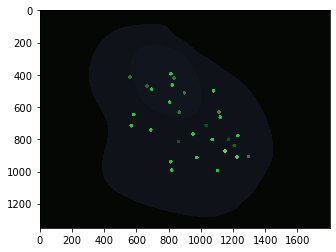

In [6]:
import imageio
import matplotlib.pyplot as plt

# Let's load the ideal image
X = plt.imread('fake_cell.tiff')
plt.imshow(X)

print(count_spot(X, 0.3))

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


21


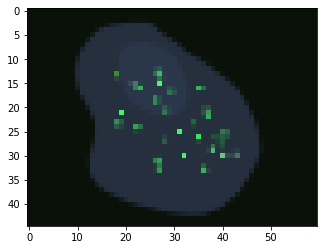

In [10]:
# The cell with a low resolution camera
xsize = X.shape[0]
ysize = X.shape[1]

pixel_x = 30
pixel_y = 30
F = np.ones((pixel_x, pixel_y))/(pixel_x*pixel_y)

Y = np.zeros((xsize//pixel_x, ysize//pixel_y, 3), dtype=int)

for i in range(0, Y.shape[0]):
    for j in range(0, Y.shape[1]):
        for c in range(0,3):
            Y[i,j, c] = np.sum(F@X[i*pixel_x:(i+1)*pixel_x, j*pixel_y:(j+1)*pixel_y, c])
Y = Y/np.max(Y)
# Y[Y<0.7] = 0
plt.imshow(Y)

print(count_spot(Y, 0.3))
imageio.imwrite('low_res_cell.png', Y)

In [40]:
# Add Poisson noise and threshold
from scipy.stats import poisson

X_noisy = np.copy(X)
# X_noisy = X_noisy[:,:]
X_noisy = X_noisy + poisson.rvs(400, loc=0, size=X_noisy.shape)
X_noisy = np.uint8(X_noisy/np.max(X_noisy)*256)
imageio.imwrite('noisy_cell.png', X_noisy)

X_noisy_filtered = ndimage.gaussian_laplace(X_noisy, sigma=2)
X_noisy_filtered[X_noisy_filtered < 0 ] = 0
X_noisy_filtered = X_noisy_filtered/np.max(X_noisy_filtered)
imageio.imwrite('noisy_cell_filtered.png', X1)


# thresholds = np.linspace(0.5, 1, 100)
# nspots = np.zeros((100,))
# for i in range(0,len(thresholds)):
#     nspots[i] = count_spot(X1, thresholds[i])



Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


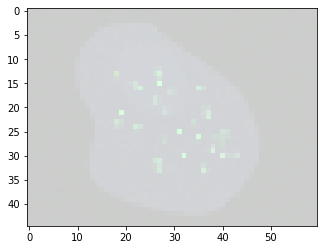

In [43]:
X_noisy_pixel = np.zeros((xsize//pixel_x, ysize//pixel_y, 3), dtype=int)

for i in range(0, X_noisy_pixel.shape[0]):
    for j in range(0, X_noisy_pixel.shape[1]):
        for c in range(0,3):
            X_noisy_pixel[i,j, c] = np.sum(F@X_noisy[i*pixel_x:(i+1)*pixel_x, j*pixel_y:(j+1)*pixel_y, c])
X_noisy_pixel = X_noisy_pixel/np.max(X_noisy_pixel)
# Y[Y<0.7] = 0
plt.imshow(X_noisy_pixel)

imageio.imwrite('low_res_noisy_cell.png', X_noisy_pixel)